### AutoEncoder

입력 데이터를 효율적으로 **압축, 복원** 하여 학습에 용이하게 하거나 노이즈를 제거.

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png" height="400">

- AE의 구조
    - Encoder
        1. 입력 데이터를 저차원의 벡터로 매핑
        2. 특성의 추출 구간
    - Latent Space(잠재 공간) : 입력 데이터를 축약하고 있는 특성 벡터
    - Decoder
        1. 인코더와 대칭
        2. 복원하는 구간

- AE의 특징 : 
    - 기본적으로 RNN과 같이 Dense층으로 구성 되어져 있다.
    - 하지만 구조상 일반적으로(아닐 수도 있음) 대칭이고, 잠재 공간(z or **code**) 이라는 층이 존재 한다.
    - 잠재 공간 벡터를 복구하는 구간이 있다.


### Encoder
- 차원 축소
- 일종의 Trade Off 가 있다. (잠재공간의 차원을 높일 것인가, 특성을 얼마나 압축할 것인가.)

### Latent Space(Code or z)
- 입력데이터의 중요한 특성을 반영하고 있다.
- 입력 데이터에 대한 압축 표현(**벡터**) : 차원의 저주를 완화시킨다.

### Decoder
- 생성형 모델(잠재공간을 다시 복구하는 과정에서 이미지가 생성)

### Loss
$$\mathscr{L} = \frac{1}{n} \sum({x_i - \hat{x_i})^2}$$

- 재 구성과정의 오차의 최소화
- MSE 또는 CEE 등이 쓰인다.
- 여기서 $x_i$  는 입력 값이지만 예측에 대한 정답 라벨이기도 하다.

### AE 응용

1. $z = f(x)$ : 인코더 부분
2. $\hat x = g(z)$ : 디코더 부분
3. $\mathscr{L} = \frac{1}{n} \sum({x_i - \hat{x_i})^2}$ : MSE or CEE

- 응용
    - 입력 데이터의 압축 및 복원 → 효율적인 데이터 저장 및 전송
    - **차원의 축소** (PCA 와 비슷하나, 좀더 비선형적이다)


        | 특징 | PCA | AE |
        | --- | --- | --- |
        | 변환 | 선형 | 비선형 |
        | 구현 | 공분산, 행렬의 고유벡터 | NN기반 Encoder, Decoder |
        | 계산 복잡 | 낮음 | 복잡 |
        | 해석 | 용이 | 어려움 |
        | 유연성  | 낮다  | 높다 |
        <br>
    - **노이즈 제거** → 중요 특성을 추출 하여 노이즈를 제거한다.
        1. 입력 값에 노이즈를 추가해 AE의 입력 값으로 넣는다
        2. 출력 과 비교할 정답 라벨로 노이즈가 추가되기 전의 입력 데이터로 넣는다

        $x_i$ : 원래의 입력

        $x'_i$ : 노이즈 된 입력

        순 전파 시 입력 데이터를 $x'_i$ 이용,

        정답 라벨과 Loss 값을 구할 때 $x_i$ 이용.

        - 새로운 데이터가 들어올 때 노이즈가 제거 된다.
    - **추천 시스템** (수천가지의 특성 들을 잠재공간에 넘기는 과정)
    - **이상치 탐지**
        1. 일반 적인 방법으로 AE학습
        2. 새로운 데이터를 넣어 재구성손실을 이용하여 이상치를 탐지한다

### Mnist data를 이용한 AE

- 인코더 디코더 모델

In [12]:
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Embedding, Flatten ### Input 모델의 입력을 정의할 때 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.regularizers import l1 ### 정규화 과적합 방지
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 인풋 스케일링
x_train1 = x_train.astype('float32')/255
x_test1 = x_test.astype('float32')/255

x_train = x_train1.reshape((60000, 28*28))
x_test = x_test1.reshape((10000, 28*28))

In [7]:
input_size = 784
hidden_size = 128
# z 의 크기
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1) # 잠재 공간

hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)

I0000 00:00:1729413312.562628   22469 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729413312.611162   22469 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729413312.616174   22469 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729413312.623034   22469 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [8]:
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train, epochs=5)
test_loss = autoencoder.evaluate(x_test, x_test)
print("Test loss:", test_loss)

Epoch 1/5


I0000 00:00:1729413314.557410   27121 service.cc:146] XLA service 0x72a1f0004ca0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729413314.557430   27121 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-10-20 17:35:14.587010: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-20 17:35:14.703746: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 208/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - loss: 0.0999

I0000 00:00:1729413317.574623   27121 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 689us/step - loss: 0.0433
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - loss: 0.0130
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 662us/step - loss: 0.0110
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - loss: 0.0100
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step - loss: 0.0094
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0094 
Test loss: 0.009063614532351494


- 인코더 모델(잠재공간 벡터만 이용)

In [13]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

encoder = Model(inputs=input_img, outputs=code)

### encode 훈련셋
X_train_encode = encoder.predict(x_train)  ### 32차원의 저차원 벡터 생성
### encode 검증셋
X_test_encode = encoder.predict(x_test)

### 단순히 시퀀셜한 구성으로 사용
model = keras.Sequential()
model.add(layers.Dense(128, activation = 'relu', input_shape=(X_train_encode.shape[1],)))
model.add(layers.Dense(10, activation = 'softmax'))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 576us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step


/home/tommy/miniconda3/envs/311/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [15]:
rmsprop = optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=rmsprop,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train_encode, y_train_one_hot,
										epochs=20, batch_size=128, validation_split = 0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6343 - loss: 1.3541 - val_accuracy: 0.8958 - val_loss: 0.3717
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.8802 - loss: 0.3876 - val_accuracy: 0.9165 - val_loss: 0.2874
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.9020 - loss: 0.3163 - val_accuracy: 0.9259 - val_loss: 0.2506
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.9210 - loss: 0.2612 - val_accuracy: 0.9359 - val_loss: 0.2158
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.9330 - loss: 0.2224 - val_accuracy: 0.9237 - val_loss: 0.2345
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.9407 - loss: 0.1972 - val_accuracy: 0.9458 - val_loss: 0.1785
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - accuracy: 0.9470 - loss: 0.1717 - val_accuracy: 0.9404 - val_loss: 0.1862
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.9495 - loss: 0.1695 - va

### AE 를 이용한 데이터 증강


1. 이미지 로딩 및 전처리: 지정된 폴더에서 이미지를 로드, 모델에 적합한 형태로  전처리
2. 오토인코더 모델 구성 및 훈련: 간단한 오토인코더 모델을 구성하고 훈련
3. 이미지 증강: 훈련된 모델을 사용하여 이미지를 증강, 결과 저장
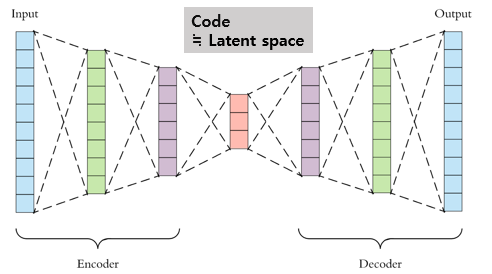

In [ ]:
# 이미지 로드
def load_images_local(folder_path, target_size=(128, 128)):
    images = []
    filenames = os.listdir(folder_path)
    for filename in filenames:
        try:
            img_path = os.path.join(folder_path, filename)
            img = load_img(img_path, target_size=target_size)
            img = img_to_array(img) / 255.0
            images.append(img)
        except:
            pass
    return np.array(images)

# 오토인코더 : 이미지 차원 축소 -> 복원
def build_autoencoder(input_shape): # input_shape=(128, 128, 3) 입력 이미지 형태(height, width, channels)
    input_img = Input(shape=input_shape) # Input : 입력 레이어 정의
    # Encoder 입력 이미지를 저차원의 표현으로 압축
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
       # 이미지 특징 추출, #3*3 필더 32개
    x = MaxPooling2D((2, 2), padding='same')(x)  # 이미지 차원 축소
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
       # # 이미지 특징 추출, #3*3 필더 16개
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder 원본 이미지 (유사한 이미지로) 복원
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x) # 이미지의 차원 확장, MaxPooling2D의 반대 과정
       # 입력된 데이터의 각 차원(가로와 세로)을 지정된 배수만큼 확대
       # UpSampling2D(size=(2,2)) :  입력 이미지의 각 픽셀을 가로 세로 2배 증가
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x) # sigmoid' 출력 이미지의 픽셀 값을 0과 1 사이로

    autoencoder = Model(input_img, decoded) # Model 객체 생성, 입력과 출력을 연결
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

# 이미지 증강 및 저장
def augment_images(autoencoder, images, save_dir):
    decoded_images = autoencoder.predict(images)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    for i, img_array in enumerate(decoded_images):
        img = array_to_img(img_array)
        img.save(os.path.join(save_dir, f'augmented_image_{i}.png'))

# 메인 실행 부분
if __name__ == "__main__":
    # 설정
    data_folder = '../data/data_mw/woman'  # 이미지가 저장된 폴더 경로
    save_folder = '../data/data_mw_add/woman_new'  # 증강된 이미지를 저장할 폴더 경로
    # save_folder = '/content/drive/MyDrive/CNN/Aug_Result/'

    # 이미지 로드 - 로컬
    images = load_images_local(data_folder)

    # 오토인코더 모델 구성 및 훈련
    autoencoder = build_autoencoder(input_shape=(128, 128, 3))
    autoencoder.fit(images, images, epochs=20, batch_size=20)

    # 이미지 증강 및 저장
    augment_images(autoencoder, images, save_folder)

